## Titanic Dataset Overview

---

| Variable   | Definition                   | Key                                            |
| ---------- | ---------------------------- | ---------------------------------------------- |
| `survival` | Survival outcome             | 0 = No, 1 = Yes                                |
| `pclass`   | Ticket class (proxy for SES) | 1 = Upper, 2 = Middle, 3 = Lower               |
| `sex`      | Sex of the passenger         | —                                              |
| `age`      | Age in years                 | Fractional if <1; estimates use xx.5           |
| `sibsp`    | # of siblings/spouses aboard | See note below                                 |
| `parch`    | # of parents/children aboard | See note below                                 |
| `ticket`   | Ticket number                | —                                              |
| `fare`     | Passenger fare               | —                                              |
| `cabin`    | Cabin number                 | —                                              |
| `embarked` | Port of Embarkation          | C = Cherbourg, Q = Queenstown, S = Southampton |

---

### Variable Notes

* **`pclass`**: Indicates socio-economic status (SES):

  * 1st = Upper class
  * 2nd = Middle class
  * 3rd = Lower class

* **`age`**: May be fractional for infants; estimates appear as decimals (e.g., 29.5).

* **`sibsp`**:

  * Siblings: brother, sister, stepbrother, stepsister
  * Spouses: husband, wife (mistresses and fiancés excluded)

* **`parch`**:

  * Parents: mother, father
  * Children: daughter, son, stepdaughter, stepson
  * Note: Children traveling only with a nanny have `parch = 0`.


**Importing Dependencies**

In [171]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

### Data Collection and Cleaning

In [172]:
# Load the dataset  into a pandas dataframe and making the first column(PassengerId) the index
titanic_df = pd.read_csv("C:/Users/USER/Desktop/Datasets/titanic/train.csv", index_col=0)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
# checking the number of rows and columns 
titanic_df.shape

(891, 11)

In [174]:
# basic overview of the data 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [175]:
# checking the number of missing values in each column 
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Handling the missing values**

In [176]:
# droping the cabin column
titanic_df = titanic_df.drop('Cabin', axis=1)

In [177]:
# replacing the missing values in 'Age' column with it's mean  
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [178]:
# replacing the missing values in 'Embarked' column with it's mode 
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [179]:
# checking the number of missing values in each column 
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Exploratory Data Analysis

In [180]:
# summary statistics 
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
# distribution of survival 
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [182]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

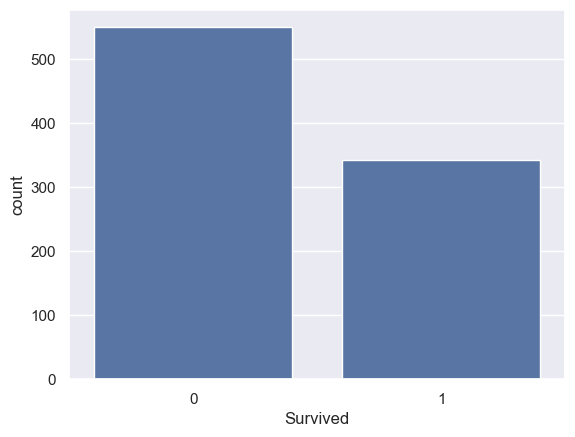

In [183]:
# visualising survived distribution with countplot 
sns.countplot(x='Survived', data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

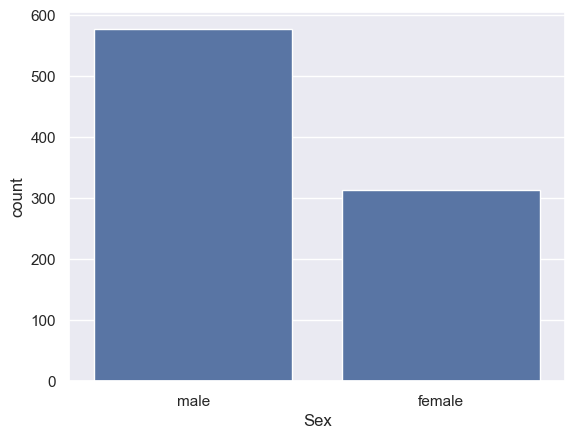

In [184]:
# visualising Sex(gender) distribution with countplot 
sns.countplot(x='Sex', data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

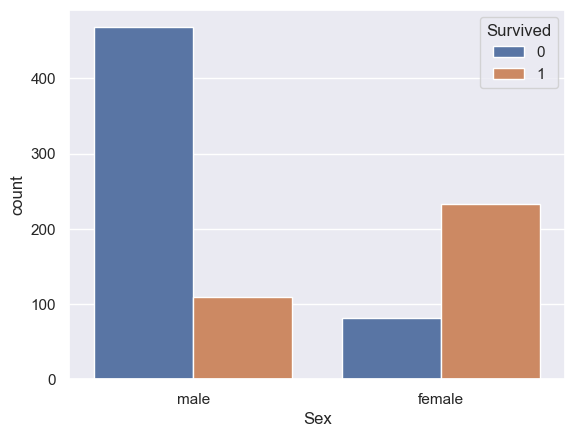

In [185]:
# distribution of survivers by Sex 
sns.countplot(x='Sex', hue='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

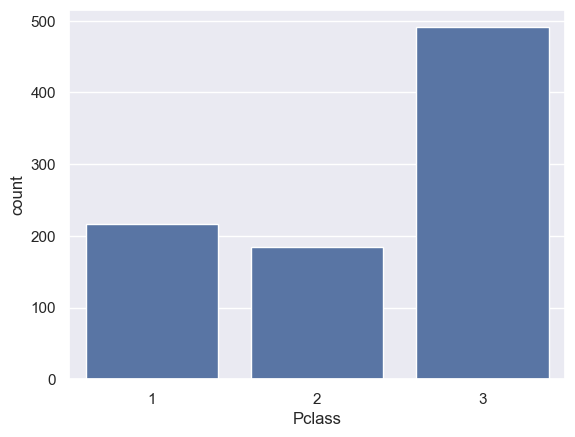

In [186]:
# visualising Sex(gender) distribution with countplot 
sns.countplot(x='Pclass', data=titanic_df)

### Data Preprocessing

**Encoding the categorical columns**

In [187]:
print(titanic_df['Sex'].value_counts())
print("\n" + "-" * 30 + "\n")
print(titanic_df['Pclass'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64

------------------------------

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [188]:
# Initialize encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the desired columns
ohe1 = ohe.fit_transform(titanic_df[['Sex', 'Embarked']])

# Create a DataFrame from the encoded data
ohe2 = pd.DataFrame(ohe1, columns=ohe.get_feature_names_out(['Sex', 'Embarked']))

# Reset index to match with the original DataFrame (important before concat)
ohe2.index = titanic_df.index

# Concatenate with the original DataFrame
titanic_df = pd.concat([titanic_df, ohe2], axis=1)


In [189]:
print(titanic_df)

             Survived  Pclass                                               Name  ... Embarked_C  Embarked_Q  Embarked_S
PassengerId                                                                       ...                                   
1                   0       3                            Braund, Mr. Owen Harris  ...        0.0         0.0         1.0
2                   1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  ...        1.0         0.0         0.0
3                   1       3                             Heikkinen, Miss. Laina  ...        0.0         0.0         1.0
4                   1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...        0.0         0.0         1.0
5                   0       3                           Allen, Mr. William Henry  ...        0.0         0.0         1.0
...               ...     ...                                                ...  ...        ...         ...         ...
887                 0       2   

**Seperating Features and Targets**

In [190]:
X = titanic_df.drop(['Name', 'Embarked_S', 'Ticket', 'Sex_female', 'Survived', 'Sex', 'Embarked'], axis=1)
Y = titanic_df['Survived']

In [191]:
print(X)

             Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_C  Embarked_Q
PassengerId                                                                            
1                 3  22.000000      1      0   7.2500       1.0         0.0         0.0
2                 1  38.000000      1      0  71.2833       0.0         1.0         0.0
3                 3  26.000000      0      0   7.9250       0.0         0.0         0.0
4                 1  35.000000      1      0  53.1000       0.0         0.0         0.0
5                 3  35.000000      0      0   8.0500       1.0         0.0         0.0
...             ...        ...    ...    ...      ...       ...         ...         ...
887               2  27.000000      0      0  13.0000       1.0         0.0         0.0
888               1  19.000000      0      0  30.0000       0.0         0.0         0.0
889               3  29.699118      1      2  23.4500       0.0         0.0         0.0
890               1  26.000000  

In [192]:
print(Y)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


**Splitting the data into Training and Test data**

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=13)

In [194]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (757, 8) (134, 8)


### Model Training and Evaluation

**Model Training**

In [195]:
model = LogisticRegression(max_iter=500)

In [196]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

**Model Evaluation**

In [197]:
# prediction on training data
X_train_prediction = model.predict(X_train)

# accuracy on training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on Training data :', training_data_accuracy)

Accuracy score on Training data : 0.8018494055482166


In [198]:
# prediction on test data
X_test_prediction = model.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test data :', test_data_accuracy)

Accuracy score on Test data : 0.7761194029850746


**Save the Trained Model**

In [199]:
joblib.dump(model, 'titanic_survival_prediction_model')

['titanic_survival_prediction_model']